### 1. Problem statement
 - Detecting fraud transactions is of great importance for any credit card company. 
 - We are tasked by a well-known company to detect potential frauds so that customers are not charged for items that they did not purchase.  

 - So the goal is to build a classifier that tells if a transaction is a fraud or not.

### 2. Import all the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
np.random.seed(0)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE

### 3. Data processing

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Histogram for feature Time

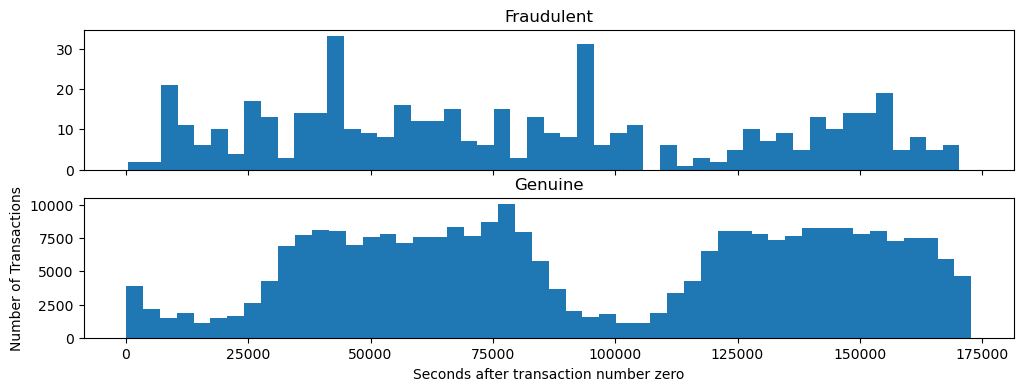

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Time"][data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(data["Time"][data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given. Thus, we'll drop this feature.

#### 3.1 Scale the Amount Variable

In [8]:
#Variance
data.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

Amount needs to be scaled. As if a feature has a variance orders of magnitude larger than the rest of the features, then it might dominate and, make the estimator unable to learn from other features as expected.

In [9]:
scaling_model = StandardScaler()
data['Normalized_Amount'] = scaling_model.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'],axis=1)

#### 3.2 Split data into training set and test set

In [10]:
X = data.drop(['Class','Time'], axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 3.3 Convert data

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### 4. Deep neural network

#### 4.1 Create model

In [12]:
model = Sequential()
model.add(Dense(input_dim = 29, units = 24, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                720       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,265
Trainable params: 1,265
Non-trainable params: 0
_________________________________________________________________


#### 4.2 Fit model

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
12461/12461 [==============================] - 46s 3ms/step - loss: 0.0068 - accuracy: 0.9991
Epoch 2/10
12461/12461 [==============================] - 33s 3ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/10
12461/12461 [==============================] - 42s 3ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 4/10
12461/12461 [==============================] - 40s 3ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 5/10
12461/12461 [==============================] - 29s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 6/10
12461/12461 [==============================] - 28s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 7/10
12461/12461 [==============================] - 27s 2ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 8/10
12461/12461 [==============================] - 29s 2ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 9/10
12461/12461 [==============================] - 27s 2ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 10/10
12461/12461 [==============================

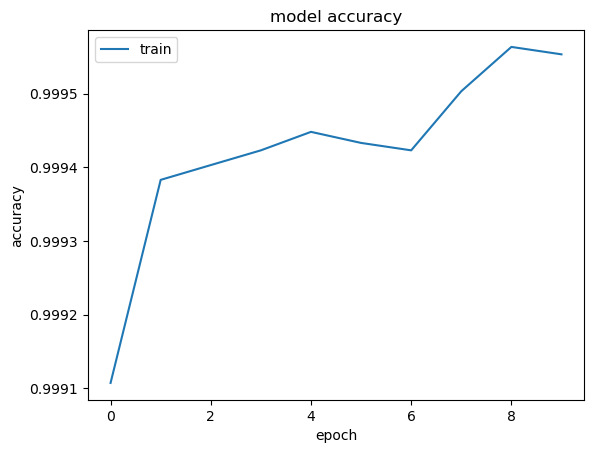

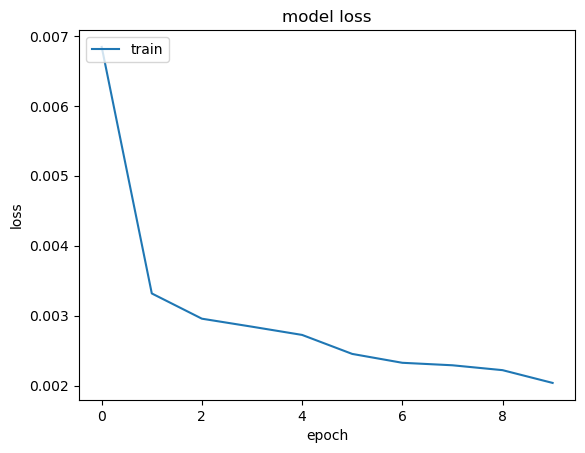

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 4.3 Evaluate model

In [16]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 6s 2ms/step - loss: 0.0037 - accuracy: 0.9994
[0.0036789521109312773, 0.9994382262229919]


In [17]:
y_pred = model.predict(X_test)

2671/2671 [==============================] - 14s 5ms/step


In [18]:
def plot_confusion_matrix(cm):
    class_feat=data['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sn.heatmap(cm, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

[[85281    15]
 [   33   114]]


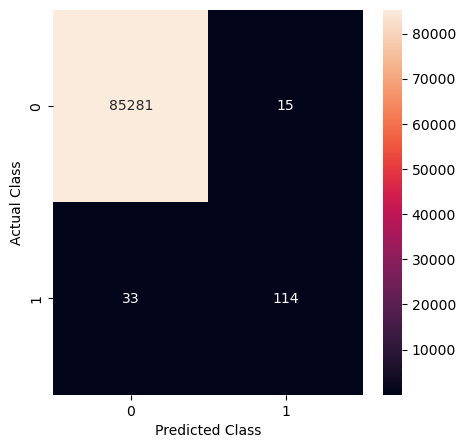

In [19]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm)

In [20]:
def print_scores(org,pred):
    accuracy = accuracy_score(org,pred)
    precision = precision_score(org,pred)
    recall = recall_score(org,pred)
    f1 = f1_score(org,pred)
    print("Accuracy : ",accuracy)
    print("Precision : ",precision)
    print("Recall : ",recall)
    print("F1 Score : ",f1)


In [21]:
print_scores(y_test,y_pred.round())

Accuracy :  0.9994382219725431
Precision :  0.8837209302325582
Recall :  0.7755102040816326
F1 Score :  0.826086956521739


#### 4.4 Undersampling & model test
#### Sampling is performed before data spliting which should be the case if future data is unbalanced, otherwise, sampling needs to be performed only on train set. 

#### 4.4.1 Undersampling

In [22]:
class1_indexes = np.array(data[data.Class == 1].index)
class0_indexes = np.array(data[data.Class == 0].index)
print(len(class0_indexes))
print(len(class1_indexes))

284315
492


In [23]:
class0_indexes = data[data.Class == 0].index
final_class0_indexes = np.random.choice(class0_indexes, len(class1_indexes), replace = False)
final_class0_indexes = np.array(final_class0_indexes)

In [24]:
under_sample_ind = np.concatenate([class1_indexes, final_class0_indexes])

In [25]:
print(len(under_sample_ind))

984


In [26]:
under_sample_data = data.iloc[under_sample_ind, :]

In [27]:
X_undersample = under_sample_data.iloc[:, :]
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']
X_undersample = X_undersample.drop(['Class','Time'], axis = 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state=0)

In [29]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 4.4.2 Model test

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                720       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,265
Trainable params: 1,265
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history2 = model.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
43/43 [==============================] - 4s 11ms/step - loss: 0.3977 - accuracy: 0.9201
Epoch 2/10
43/43 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9331
Epoch 3/10
43/43 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.9506
Epoch 4/10
43/43 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9506
Epoch 5/10
43/43 [==============================] - 0s 5ms/step - loss: 0.1157 - accuracy: 0.9520
Epoch 6/10
43/43 [==============================] - 0s 4ms/step - loss: 0.1089 - accuracy: 0.9535
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9549
Epoch 8/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9564
Epoch 9/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9578
Epoch 10/10
43/43 [==============================] - 1s 15ms/step - loss: 0.0921 - accuracy: 0.9578


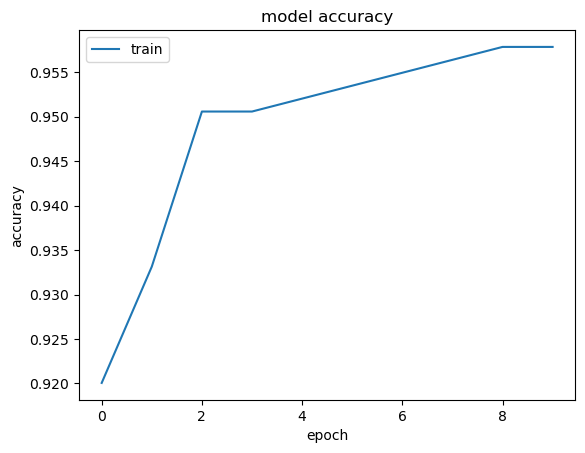

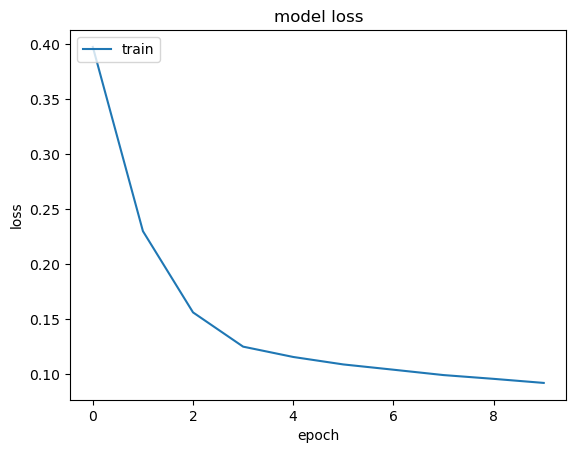

In [32]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [33]:
y_pred = model.predict(X_test)

10/10 [==============================] - 1s 15ms/step


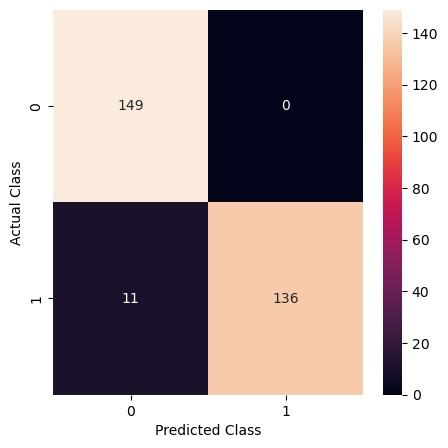

In [34]:
cm = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

In [35]:
print_scores(y_test,y_pred.round())

Accuracy :  0.9628378378378378
Precision :  1.0
Recall :  0.9251700680272109
F1 Score :  0.9611307420494699


#### 4.5 SMOTE & Model test

#### 4.5.1 SMOTE - Oversampling
sampling is performed before data spliting which should be the case if future data is unbalanced

In [36]:
X_created, y_created = SMOTE().fit_resample(X, y)

In [37]:
counter = Counter(y_created)
print(counter)

Counter({0: 284315, 1: 284315})


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_created, y_created, test_size = 0.3,random_state=0)

In [39]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 4.5.2 Model test

In [40]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history3 = model.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
24878/24878 [==============================] - 85s 3ms/step - loss: 0.0193 - accuracy: 0.9935
Epoch 2/10
24878/24878 [==============================] - 71s 3ms/step - loss: 0.0083 - accuracy: 0.9977
Epoch 3/10
24878/24878 [==============================] - 75s 3ms/step - loss: 0.0062 - accuracy: 0.9983
Epoch 4/10
24878/24878 [==============================] - 71s 3ms/step - loss: 0.0054 - accuracy: 0.9986
Epoch 5/10
24878/24878 [==============================] - 71s 3ms/step - loss: 0.0047 - accuracy: 0.9988
Epoch 6/10
24878/24878 [==============================] - 70s 3ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 7/10
24878/24878 [==============================] - 75s 3ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 8/10
24878/24878 [==============================] - 75s 3ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 9/10
24878/24878 [==============================] - 68s 3ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 10/10
24878/24878 [==============================

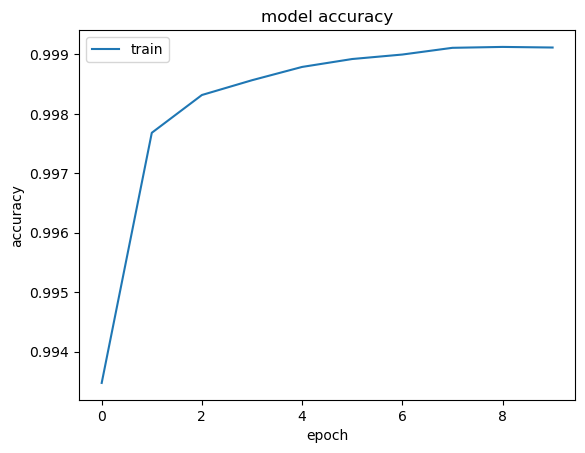

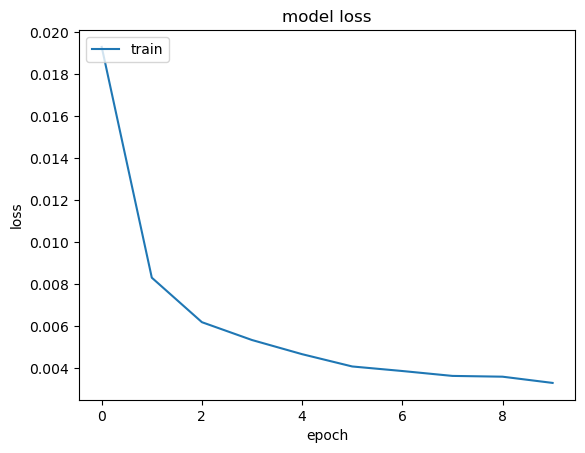

In [41]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [42]:
y_pred = model.predict(X_test)

5331/5331 [==============================] - 8s 2ms/step


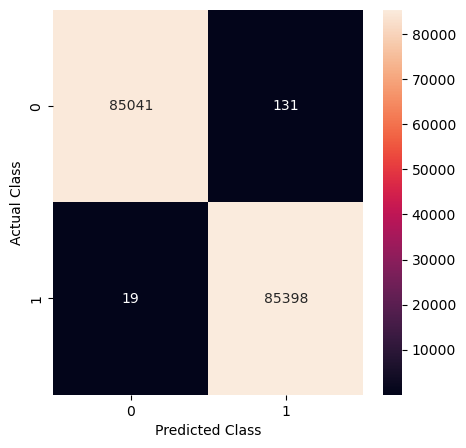

In [43]:
cm = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

In [44]:
print_scores(y_test,y_pred.round())

Accuracy :  0.9991206935968908
Precision :  0.998468355762373
Recall :  0.9997775618436611
F1 Score :  0.9991225299217297
